# Survival Analysis Lab

Complete the following exercises to solidify your knowledge of survival analysis.

In [64]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter

In [2]:
data = pd.read_csv('../data/attrition.csv')

In [26]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

*Tip: If your lines have gaps in them, you can fill them in by using the `fillna(method=ffill)` and the `fillna(method=bfill)` methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab*

In [4]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [158]:
def survival_flex(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    if isinstance(group_field, list):
        for i in data[group_field[0]].unique():
            group_0 = data[data[group_field[0]] == i]
            for j in group_0[group_field[1]].unique():
                group = group_0[group_0[group_field[1]] == j]
                T = group[time_field]
                E = group[event_field]
                kmf.fit(T, E, label=str(i)+"_"+str(j))
                results.append(kmf.survival_function_)
    
    elif isinstance(group_field, str):
        for i in data[group_field].unique():
            group = data[data[group_field]==i]
            T = group[time_field]
            E = group[event_field]
            kmf.fit(T, E, label=str(i))
            results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [146]:
rates_gender = survival(data, 'Gender', 'YearsAtCompany', 'Attrition')
rates_age = survival(data, 'Age', 'YearsAtCompany', 'Attrition')

In [109]:
rates_age_0_20 = pd.DataFrame()
rates_age_21_30 = pd.DataFrame()
rates_age_31_40 = pd.DataFrame()
rates_age_41_50 = pd.DataFrame()
rates_age_51_60 = pd.DataFrame()

for col in rates_age:
    if int(col) < 21:
        rates_age_0_20[col] = rates_age[col]
    elif int(col) < 31:
        rates_age_21_30[col] = rates_age[col]
    elif int(col) < 41:
        rates_age_31_40[col] = rates_age[col]
    elif int(col) < 51:
        rates_age_41_50[col] = rates_age[col]    
    elif int(col) < 61:
        rates_age_51_60[col] = rates_age[col]  
        
rates_age_binned = pd.concat({'0-20':rates_age_0_20.mean(skipna = True, axis = 1), 
                              '21-30':rates_age_21_30.mean(skipna = True, axis = 1), 
                              '31-40':rates_age_31_40.mean(skipna = True, axis = 1), 
                              '41-50':rates_age_41_50.mean(skipna = True, axis = 1), 
                              '51-60':rates_age_51_60.mean(skipna = True, axis = 1)}, 
                             axis=1)

rates_age_binned.head()


,0-20,21-30,31-40,41-50,51-60
timeline,,,,,
0.0,0.759259,0.977124,0.994637,0.996667,1.000000
1.0,0.484848,0.881439,0.960675,0.979470,0.983083
2.0,0.424242,0.836757,0.943189,0.976613,0.980451
3.0,NaN,0.777758,0.931577,0.964683,0.977326
4.0,NaN,0.798297,0.917880,0.944952,0.965110


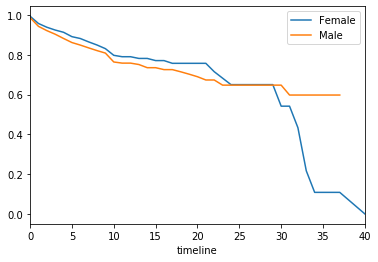

In [61]:
rates_gender.plot()

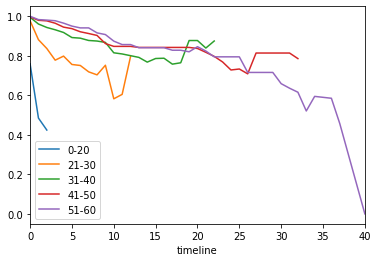

In [62]:
rates_age_binned.plot()

## 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

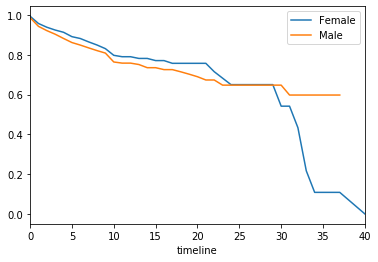

In [70]:
#Same as the one above
rates_gender.plot()


## 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this.

In [117]:
rates_female = survival(data[data['Gender'] == 'Female'], 'YearsSinceLastPromotion', 'YearsAtCompany', 'Attrition')
rates_male = survival(data[data['Gender'] == 'Male'], 'YearsSinceLastPromotion', 'YearsAtCompany', 'Attrition')

In [118]:
rates_female = rates_female.reindex(sorted(rates_female.columns, key=lambda x: int(x)), axis=1)
rates_male = rates_male.reindex(sorted(rates_male.columns, key=lambda x: int(x)), axis=1)

In [121]:
rates_female_binned = pd.DataFrame({'0-2':rates_female.iloc[:,:3].mean(skipna = True, axis = 1),
                                    '3-5':rates_female.iloc[:,4:6].mean(skipna = True, axis = 1),
                                    '6-9':rates_female.iloc[:,7:9].mean(skipna = True, axis = 1),
                                    '10-12':rates_female.iloc[:,10:12].mean(skipna = True, axis = 1),
                                    '12-14':rates_female.iloc[:,13:15].mean(skipna = True, axis = 1),
                                    '15':rates_female.iloc[:,-1:].mean(skipna = True, axis = 1)
                                   })

rates_male_binned = pd.DataFrame({'0-2':rates_male.iloc[:,:3].mean(skipna = True, axis = 1),
                                    '3-5':rates_male.iloc[:,4:6].mean(skipna = True, axis = 1),
                                    '6-9':rates_male.iloc[:,7:9].mean(skipna = True, axis = 1),
                                    '10-12':rates_male.iloc[:,10:12].mean(skipna = True, axis = 1),
                                    '12-14':rates_male.iloc[:,13:15].mean(skipna = True, axis = 1),
                                    '15':rates_male.iloc[:,-1:].mean(skipna = True, axis = 1)
                                   })

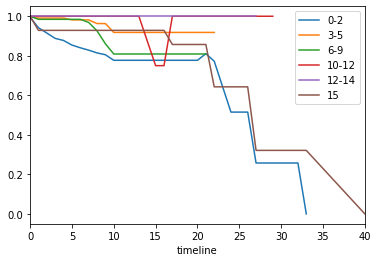

In [122]:
#Female Rates Plot

rates_female_binned.plot()

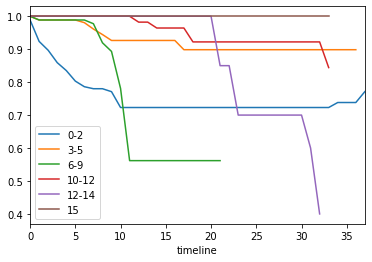

In [123]:
#Male Rates Plot

rates_male_binned.plot()

## 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company.

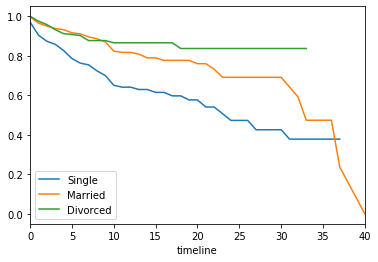

In [125]:
rates_ms = survival(data, 'MaritalStatus', 'YearsAtCompany', 'Attrition')

rates_ms.plot()



## 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

In [169]:
rates_ms_age = survival_flex(data, ['MaritalStatus','Age'], 'YearsAtCompany', 'Attrition')

rates_ms_age = rates_ms_age.reindex(sorted(rates_ms_age.columns), axis=1)

rates_ms_age.columns

Index(['Divorced_22', 'Divorced_23', 'Divorced_24', 'Divorced_25',
       'Divorced_26', 'Divorced_27', 'Divorced_28', 'Divorced_29',
       'Divorced_30', 'Divorced_31',
       ...
       'Single_50', 'Single_51', 'Single_52', 'Single_53', 'Single_54',
       'Single_55', 'Single_56', 'Single_58', 'Single_59', 'Single_60'],
      dtype='object', length=119)

## 6. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together. 

Create a new field in the data set that concatenates marital status and gender, and then generate and plot a survival curve that shows the retention by this new field over the age of the employee.

## 6. Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.

## 7. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

## 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

Filter the data set for just the sales department and then generate and plot survival curves by job role and the number of years at the company.

## 9. Let examine how compensation affects attrition.

- Use the `pd.qcut` method to bin the HourlyRate field into 5 different pay grade categories (Very Low, Low, Moderate, High, and Very High).
- Generate and plot survival curves showing employee retention by pay grade and age.

## 10. Finally, let's take a look at how the demands of the job impact employee attrition.

- Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
- Create a new field that concatenates that field with the BusinessTravel field.
- Generate and plot survival curves showing employee retention based on these conditions and employee age.